In [2]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\JohntheGreat\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)) )
    union = len(array_1) + len(array_2) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity

def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary       

In [4]:
x = []
y = []
for n in range(2,21):
        
    books_comparison = compare_files('C:\\Users\\JohntheGreat\\Documents\\MSCA\\BigData\\Week5TextAnalysis\\Assignment4\\Books\\',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    print(str(n) + ":" + str(a.mean()))
    x.append(n)
    y.append(a.mean()*100)

2:0.0598626648176
3:0.0335858221272
4:0.013442884896
5:0.00880859783193
6:0.00791395795459
7:0.00777478824251
8:0.00774170799063
9:0.00770984126098
10:0.00768258471338
11:0.00765763370897
12:0.00763896064113
13:0.00762028889426
14:0.00760238585785
15:0.00758723764867
16:0.00757209034419
17:0.00755694394434
18:0.00754179844902
19:0.00752665385813
20:0.0075115101716


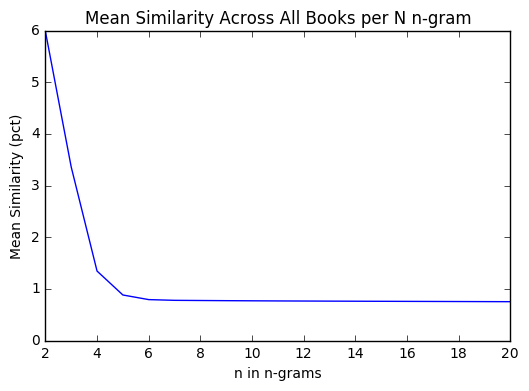

In [5]:
pylab.plot(x,y)
pylab.xlabel('n in n-grams')
pylab.ylabel('Mean Similarity (pct)')
pylab.title('Mean Similarity Across All Books per N n-gram')

In [6]:
x = []
y = []
for n in range(2,21):
    
    art_comparison = compare_files('C:\\Users\\JohntheGreat\\Documents\\MSCA\\BigData\\Week5TextAnalysis\\Assignment4\\Articles\\',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    print(str(n) + ":" + str(a.mean()))
    x.append(n)
    y.append(a.mean()*100)

2:0.0108288386656
3:0.00279715300897
4:0.00187829031449
5:0.00159221509379
6:0.0014324079854
7:0.00131953608751
8:0.00121411430324
9:0.00113855699351
10:0.00107544011399
11:0.00101760172729
12:0.000975753279726
13:0.000946946246189
14:0.000918180811257
15:0.000889456535074
16:0.000860772981259
17:0.000832129716848
18:0.000806892865463
19:0.000783335528773
20:0.00076225836003


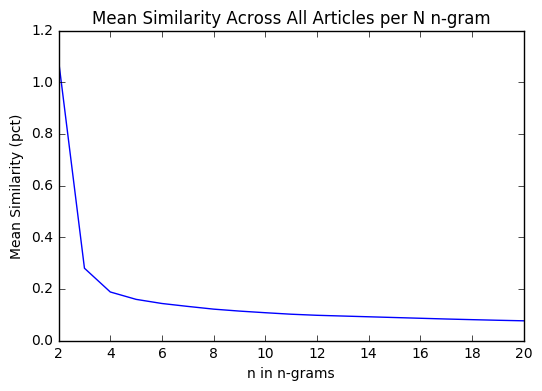

In [7]:
pylab.plot(x,y)
pylab.xlabel('n in n-grams')
pylab.ylabel('Mean Similarity (pct)')
pylab.title('Mean Similarity Across All Articles per N n-gram')

In [8]:
books_comparison = compare_files('C:\\Users\\JohntheGreat\\Documents\\MSCA\\BigData\\Week5TextAnalysis\\Assignment4\\Books\\',ngram_size=5,threshold=0.00880859783193)

for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    print (str(book1) + " is similar to " + str(book2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

Adventures_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 1.827%


Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 1.518%


Hound_of_the_Baskervilles.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 1.786%




In [9]:
# The Sherlock Holmes books are all similar, between 1.5% and
# 1.8%. The book 3 men in a boat is dissimilar from the others.

In [12]:
articles_comparison = compare_files('C:\\Users\\JohntheGreat\\Documents\\MSCA\\BigData\\Week5TextAnalysis\\Assignment4\\Articles\\',ngram_size=4,threshold=0.00187829031449)

for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index))

article16.txt is similar to article17.txt with a Similarity Index of 71.717%
article40.txt is similar to article9.txt with a Similarity Index of 0.206%
article1.txt is similar to article10.txt with a Similarity Index of 0.233%
article21.txt is similar to article37.txt with a Similarity Index of 0.690%
article14.txt is similar to article6.txt with a Similarity Index of 6.863%
article21.txt is similar to article30.txt with a Similarity Index of 0.844%
article31.txt is similar to article32.txt with a Similarity Index of 0.532%
article26.txt is similar to article31.txt with a Similarity Index of 5.921%
article6.txt is similar to article8.txt with a Similarity Index of 0.340%
article14.txt is similar to article8.txt with a Similarity Index of 0.855%
article10.txt is similar to article11.txt with a Similarity Index of 0.847%
article22.txt is similar to article37.txt with a Similarity Index of 0.467%
article18.txt is similar to article3.txt with a Similarity Index of 0.769%
article10.txt is s

In [11]:
# For the articles, we can see that 16 and 17 are the most similar at 71% and 
# articles 10 and 13 are at a 20% similarity. 14/6, 3/4, 10/6 and 14/6 all
# have similarities above 5%


# I chose n=5 for books, and n=4 for articles because that is where the 
# kinks incurves are on the Mean Similarity Charts. Using N's higher 
# than this leads to a similarity percentage level that tails off. 

# I assume that the n's for books and means are different because 
# of sample size when looking at the similarities. The total texts 
# of the books are much longer than the total texts of the articles. 
# So for the books, we can have larger n-gramsthat are similar, 
# vs in the shorter articles.